In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the data
data = pd.read_csv('All_Data.csv')

In [5]:
# Drop the 'Datetime' column as it's not needed for the prediction
data = data.drop(columns=['Datetime'])

# Handle missing values by filling them with the mean of each column
# data = data.fillna(data.mean())
# Handle missing values by dropping them
data = data.dropna().reset_index(drop=True)

In [6]:
# Separate features and target variable
X = data.drop(columns=['nb_persons_SH'])
y = data['nb_persons_SH']

In [7]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Reshape the data for 1D CNN (samples, timesteps, features)
# Here, we assume each sample is a single timestep with multiple features
X = X.reshape((X.shape[0], X.shape[1], 1))


y= to_categorical(y, num_classes=int(y.max() + 1))

In [9]:
# Load the model from the HDF5 file
loaded_model = tf.keras.models.load_model('1DCNN.keras')

c:\Users\Charles\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [11]:
# # Evaluate the loaded model to ensure it's working correctly
loaded_loss, loaded_accuracy = loaded_model.evaluate(X, y)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9587 - loss: 0.3709      
Loaded model validation accuracy: 0.9505


In [12]:
y_pred = loaded_model.predict(X)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [13]:
y_pred_cat = np.argmax(y_pred, axis=1)
print(y_pred_cat)

[0 0 0 ... 0 0 0]


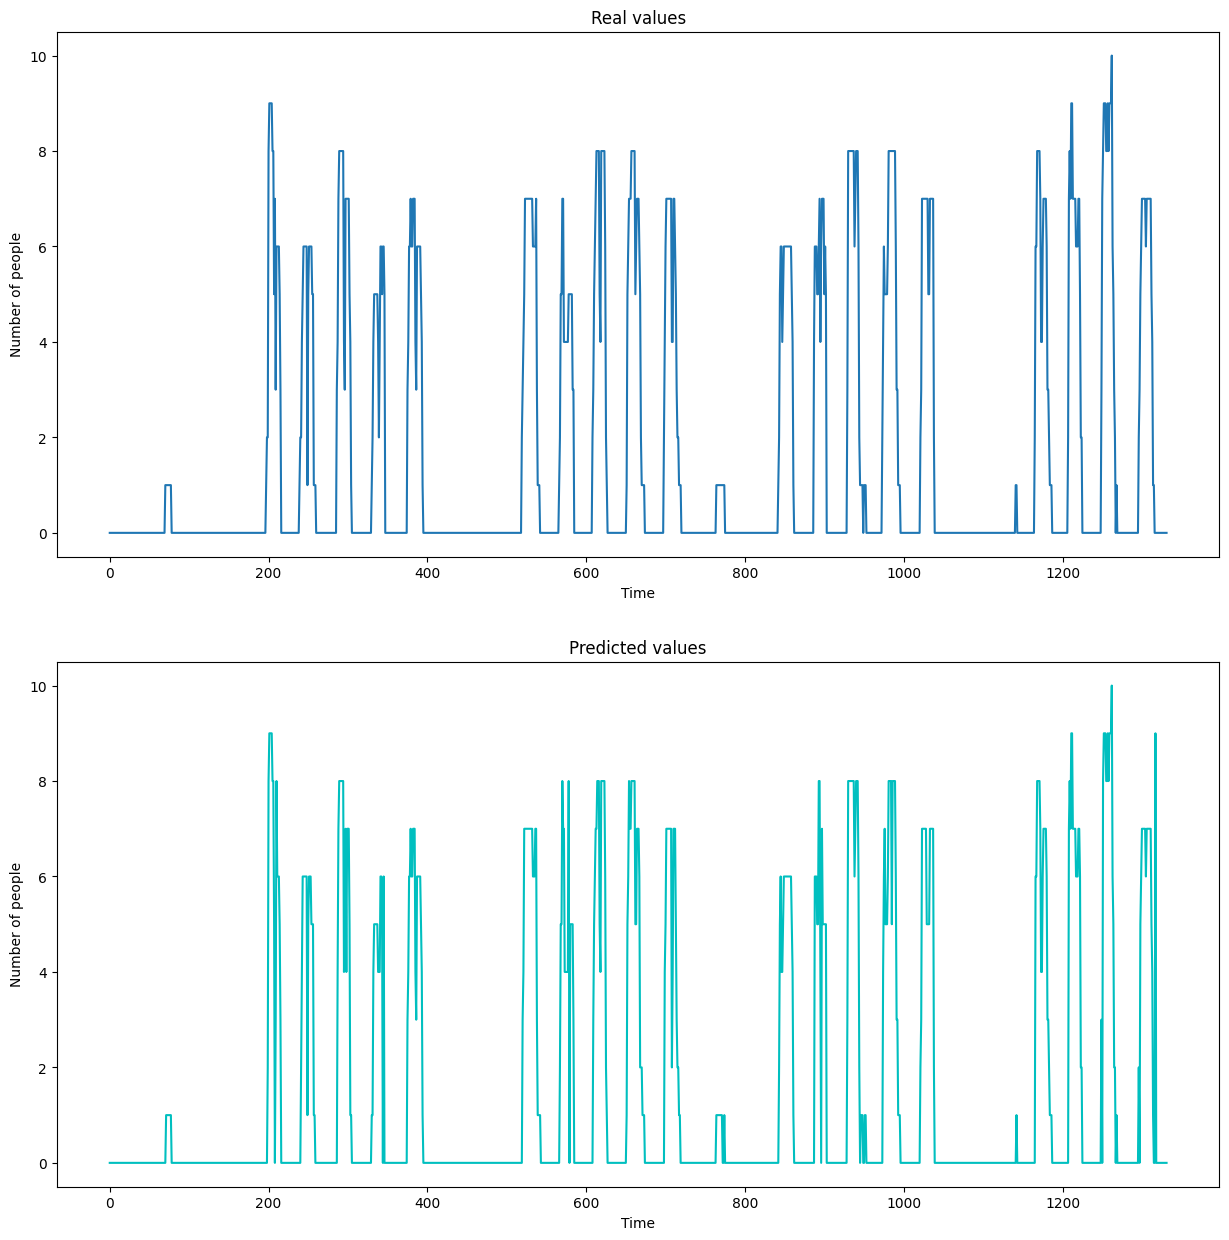

In [14]:
plt.close()
#plot 1:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
sns.lineplot(data['nb_persons_SH'])
plt.title('Real values')
plt.xlabel('Time')
plt.ylabel('Number of people')

#plot 2:
plt.subplot(2, 1, 2)
sns.lineplot(y_pred_cat,color='c')
plt.title('Predicted values')
plt.xlabel('Time')
plt.ylabel('Number of people')

plt.show()

In [15]:
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 10, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 5, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 2, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,699 (151.17 KB)

 Trainable params: 38,699 (151.17 KB)

 Non-trainable params: 0 (0.00 B)